In [3]:
import pandas as pd
import numpy as np
import csv
class PreProcessing():
    def __init__(self, data):
        self.data = data
        
        
    def clean_data(self):
        data = self.data
        #data.drop('Unnamed: 0', axis=1, inplace=True)
        for col in data.columns:
            if np.sum(data[col].isnull())>(data.shape[0]*0.8):
                data.drop(columns=col, inplace=True) # This will drop company because it has more than 80% missing values
            #df.drop("company",axis=1, inplace=True)
            data["country"].fillna(data.country.mode().to_string(), inplace=True)
            data.dropna(subset=["agent"], inplace=True)
            data["agent"].fillna(data.country.mode().to_string(), inplace=True)
            data["children"].fillna(round(data.children.mean()), inplace=True)
            
#         print(f'The shape of the data: {data.shape}')
        #print(f'Total Number of Null values: {data.isnull().sum().sum()}')
    def data_format(self):
        data = self.data
        data['arrival_date']=pd.to_datetime(data.arrival_date_year.astype(str)+'/'+data.arrival_date_month.astype(str)+'/'+data.arrival_date_day_of_month.astype(str))
        data.drop(columns=["arrival_date_week_number","arrival_date_day_of_month"],inplace=True)
        data[["children","agent",]]=data[["children","agent"]].astype('int64')
        data['total_stay'] = data['stays_in_weekend_nights']+data['stays_in_week_nights']
        data.drop(data[data['adr'] > 5000].index, inplace = True)
        data.drop_duplicates(inplace=True)
        print(f'The shape of the data: {data.shape}')    
        data.to_csv('Results/cleaned_data.csv', index=False,sep=',')
        #print(f'Total Number of Null values: {data.isnull().sum().sum()}')
        
def total_preprocessing(data):
    data = PreProcessing(data)
    data.clean_data()
    data.data_format()
    return data.data
data = pd.read_csv('hotel_bookings.csv')
total_preprocessing(data)

The shape of the data: (75199, 31)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stay
3,Resort Hotel,0,13,2015,July,0,1,1,0,0,...,304,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1
4,Resort Hotel,0,14,2015,July,0,2,2,0,0,...,240,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2
7,Resort Hotel,0,9,2015,July,0,2,2,0,0,...,303,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-01,2
8,Resort Hotel,1,85,2015,July,0,3,2,0,0,...,240,0,Transient,82.00,0,1,Canceled,2015-05-06,2015-07-01,3
9,Resort Hotel,1,75,2015,July,0,3,2,0,0,...,15,0,Transient,105.50,0,0,Canceled,2015-04-22,2015-07-01,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,2,5,2,0,0,...,394,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,7
119386,City Hotel,0,102,2017,August,2,5,3,0,0,...,9,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,7
119387,City Hotel,0,34,2017,August,2,5,2,0,0,...,9,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,7
119388,City Hotel,0,109,2017,August,2,5,2,0,0,...,89,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,7


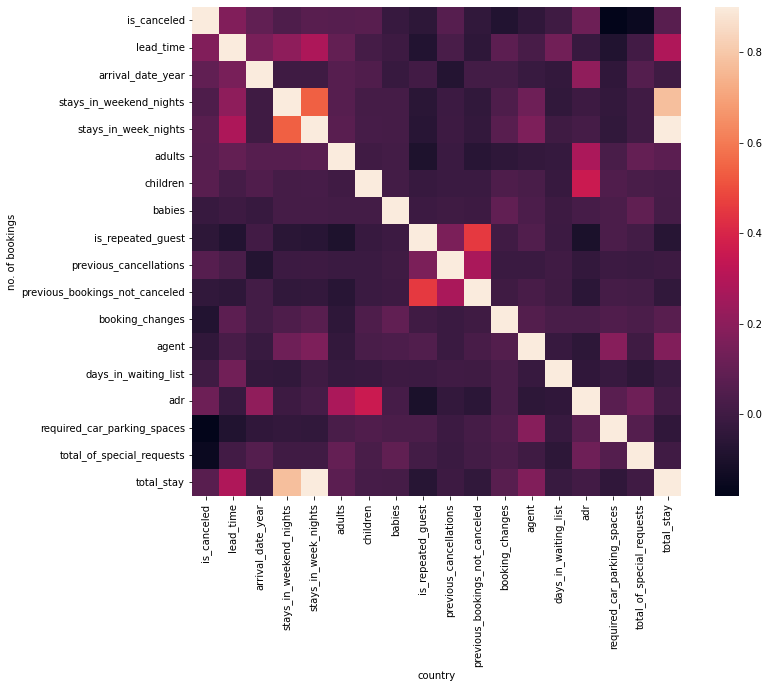

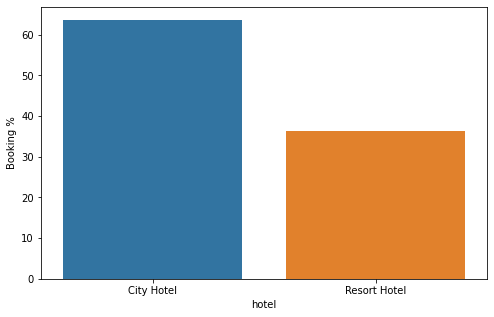

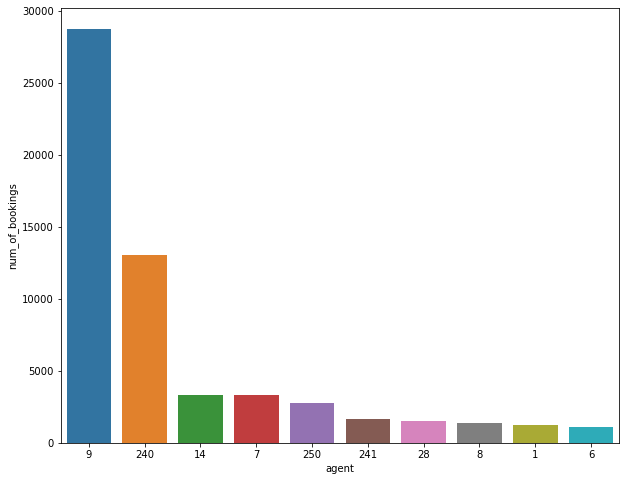

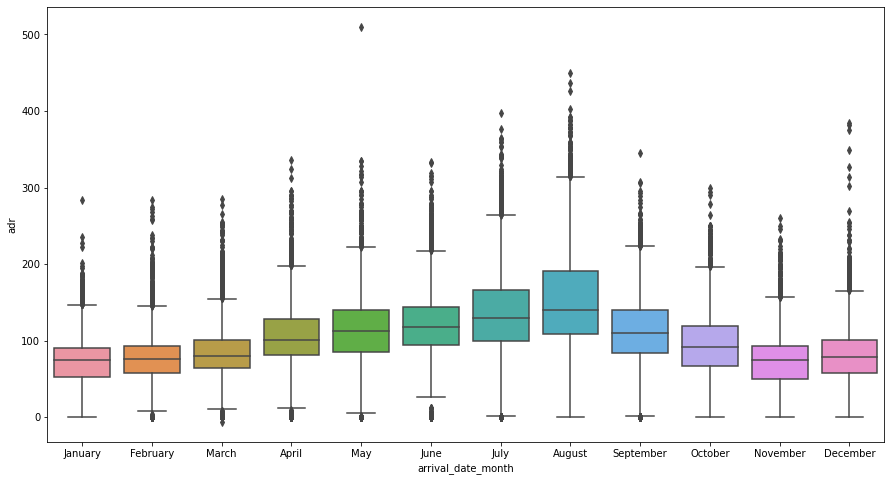

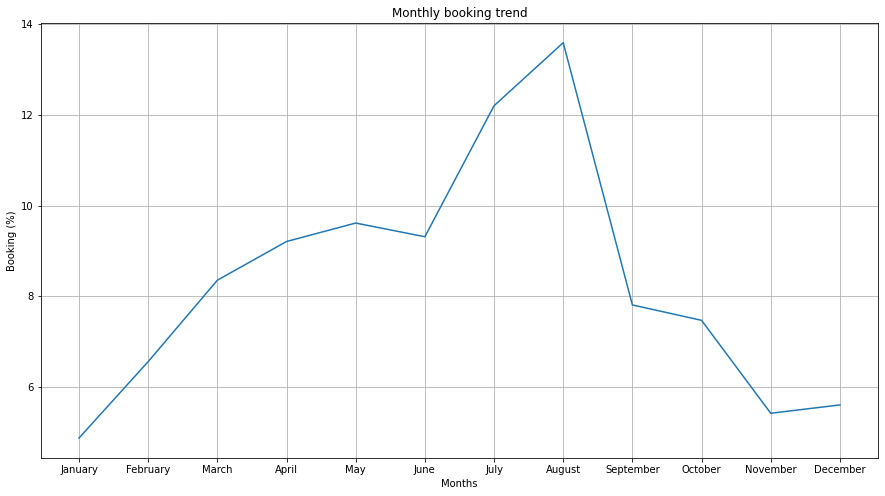

In [8]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class Analysis():
    def __init__(self, new_data):
        self.new_data = new_data
        
        
    def statistics(self):
        stats = self.new_data.describe()
        stats.to_csv('Results/statistics1.csv', index=True,sep=',')
    def correlation(self):
        corrmatrix = self.new_data.corr()
        fig = plt.figure(figsize = (12, 9))
        sns.heatmap(corrmatrix, vmax = .9, square = True)
        fig.figure.savefig("Results/correlation1.pdf")
        #plt.show()
    def scatter_plot(self):
        grp_by_country = self.new_data.groupby('country')
        data2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
        data2 = data2[:10]
        scatter=sns.scatterplot(x = data2.index, y = data2['no. of bookings'])
        plt.show()
        scatter.figure.savefig('Results/Scatterplot1.pdf')
        
       # data = self.new_data
        #plt.figure(figsize = (12,6))
        #scrp = sns.scatterplot(y = 'adr', x = 'total_stay', data = data)
        #scrp.figure.savefig("Results/scatterplot1.pdf")
    def box_plot(self):
        months = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
        self.new_data['arrival_date_month'] = pd.Categorical(self.new_data['arrival_date_month'],categories=months,ordered=True)
        plt.figure(figsize = (15,8))
        plot2 = sns.boxplot(x = self.new_data['arrival_date_month'],y = self.new_data['adr'])
        plot2.figure.savefig('Results/Boxplot1.pdf')
    def barplot(self):
        grouped_by_hotel = self.new_data.groupby('hotel')
        data11 = pd.DataFrame((grouped_by_hotel.size()/self.new_data.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
        plt.figure(figsize = (8,5))
        plot3 = sns.barplot(x = data11['hotel'], y = data11['Booking %'] )
        plot3.figure.savefig('Results/Barplot1.pdf')
        #plt.show()
    def barplot2(self):
        bar = pd.DataFrame(self.new_data['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}
                                                                   ).sort_values(by = 'num_of_bookings', ascending = False)
        bar.drop(bar[bar['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
        bar = bar[:10]                                                   # Selecting top 10 performing agents
        plt.figure(figsize = (10,8))
        sns.barplot(x = 'agent', y = 'num_of_bookings', data = bar, order = bar.sort_values('num_of_bookings', ascending = False).agent)
        plt.savefig('Results/Agent-bookings.pdf')
        #plt.show()
    def lineplot(self):
        months = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
        sorted_months = self.new_data.arrival_date_month.value_counts().reindex(months)
        x = sorted_months.index
        y = sorted_months/sorted_months.sum()*100
        plt.figure(figsize=(15,8))
        plt.xlabel('Months')
        plt.ylabel('Booking (%)')
        plt.title('Monthly booking trend')
        plt.plot(x, y)
        plt.grid()
        plt.savefig('Results/lineplot.pdf')
        plt.show()
def complete_analysis(new_data):
    new_data = Analysis(new_data)
    new_data.statistics()
    new_data.correlation()
    new_data.scatter_plot()
    new_data.barplot()
    new_data.barplot2()
    new_data.box_plot()
    new_data.lineplot()
new_data = pd.read_csv('Results/cleaned_data1.csv')
complete_analysis(new_data)

In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import Preprocessing as pp
from Preprocessing import total_preprocessing
import Analysis as ca
import warnings
import csv
warnings.filterwarnings("ignore")

data = pd.read_csv('hotel_bookings.csv')
data = pp.total_preprocessing(data)
#data.to_csv('Results/cleaned_data1.csv', index=True,sep=',')
new_data = pd.read_csv('Results/cleaned_data1.csv')
ca.complete_analysis(new_data)
